**Load Cleaned data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('cleaned_data9.csv')
data.head()

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0.695320,1,3,5.0,2.0,2,2,1,0,1.0,2.0,0,0
1,1,-1.161933,1,32,4.0,3.0,0,0,1,1,7.0,3.0,0,1
2,1,-0.596682,0,35,2.0,2.0,1,2,1,1,3.0,1.0,0,1
3,1,-1.484933,1,32,5.0,1.0,0,1,1,1,10.0,1.0,1,1
4,0,-0.838933,1,2,1.0,1.0,1,0,1,1,9.0,4.0,1,0


In [5]:
data.shape

(140583, 14)

In [7]:
data.duplicated().sum()

3600

In [89]:
# data.drop_duplicates(inplace=True)

In [9]:
X=data.drop(columns='Depression')
y=data['Depression']

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['Profession'] = sc.fit_transform(X[['Profession']])

In [98]:
X.head()

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,0.695394,1,-1.573331,5.0,2.0,2,2,0,1.0,2.0,0
1,1,-1.161819,1,0.813246,4.0,3.0,0,0,1,7.0,3.0,0
2,1,-0.596580,0,1.060134,2.0,2.0,1,2,1,3.0,1.0,0
3,1,-1.484813,1,0.813246,5.0,1.0,0,1,1,10.0,1.0,1
4,0,-0.838826,1,-1.655627,1.0,1.0,1,0,1,9.0,4.0,1


**Undersampling of majority class**

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# rs = RandomUnderSampler(random_state=42)
# X, y = rs.fit_resample(X,y)

# y.value_counts()

**Over sampling of Minority class by SMOTE**

In [91]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X, y = SMOTE.fit_resample(X, y)

y.value_counts()

Depression
0    115015
1    115015
Name: count, dtype: int64

In [11]:
X.shape,y.shape

((140583, 13), (140583,))

## Step-4: Modelling

**1. Logistic Regression**

In [14]:
# Modeling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X,y)

# Predict & Evaluation on train data
ypred=log_model.predict(X) # default threshold value is 0.5
from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y,ypred))

# Cross validation on train data
from sklearn.model_selection import cross_val_score
print('CV Score:',cross_val_score(log_model,X,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.9293228911034762
CV Score: 0.9293157901924489


**2. KNN**
- KNN is not working perfectly on large dataset

In [ ]:
# Hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,10)),'p':[1,2]}
from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X,y)

# KNN With best hyperparameters
knn_grid.best_estimator_

In [ ]:
# Modeling
knn_model=knn_grid.best_estimator_
knn_model.fit(X,y)

# Predict & Evaluate on train data
ypred=knn_model.predict(X)
print('Train accuracy:',accuracy_score(y,ypred))

# Cross validation on train data
print('CV Score:',cross_val_score(knn_model,X,y,cv=5,scoring='accuracy').mean())

**3. SVM**
- SVM is not also working properly for large dataset

In [ ]:
# Hyperparameter tuning
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X,y)

# SVM with best hyperparameters
svm_grid.best_estimator_

In [ ]:
# Modeling
svm_model=svm_grid.best_estimator_
svm_model.fit(X,y)

# Predict & Evaluate on train data
ypred=svm_model.predict(X)
print('Train accuracy:',accuracy_score(y,ypred))

# Cross validation on train data
print('CV Score:',cross_val_score(svm_model,X,y,cv=5,scoring='accuracy').mean())

**4. Decision Tree Classifier**

In [98]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=True)
model.fit(X,y)

DecisionTreeClassifier(random_state=True)

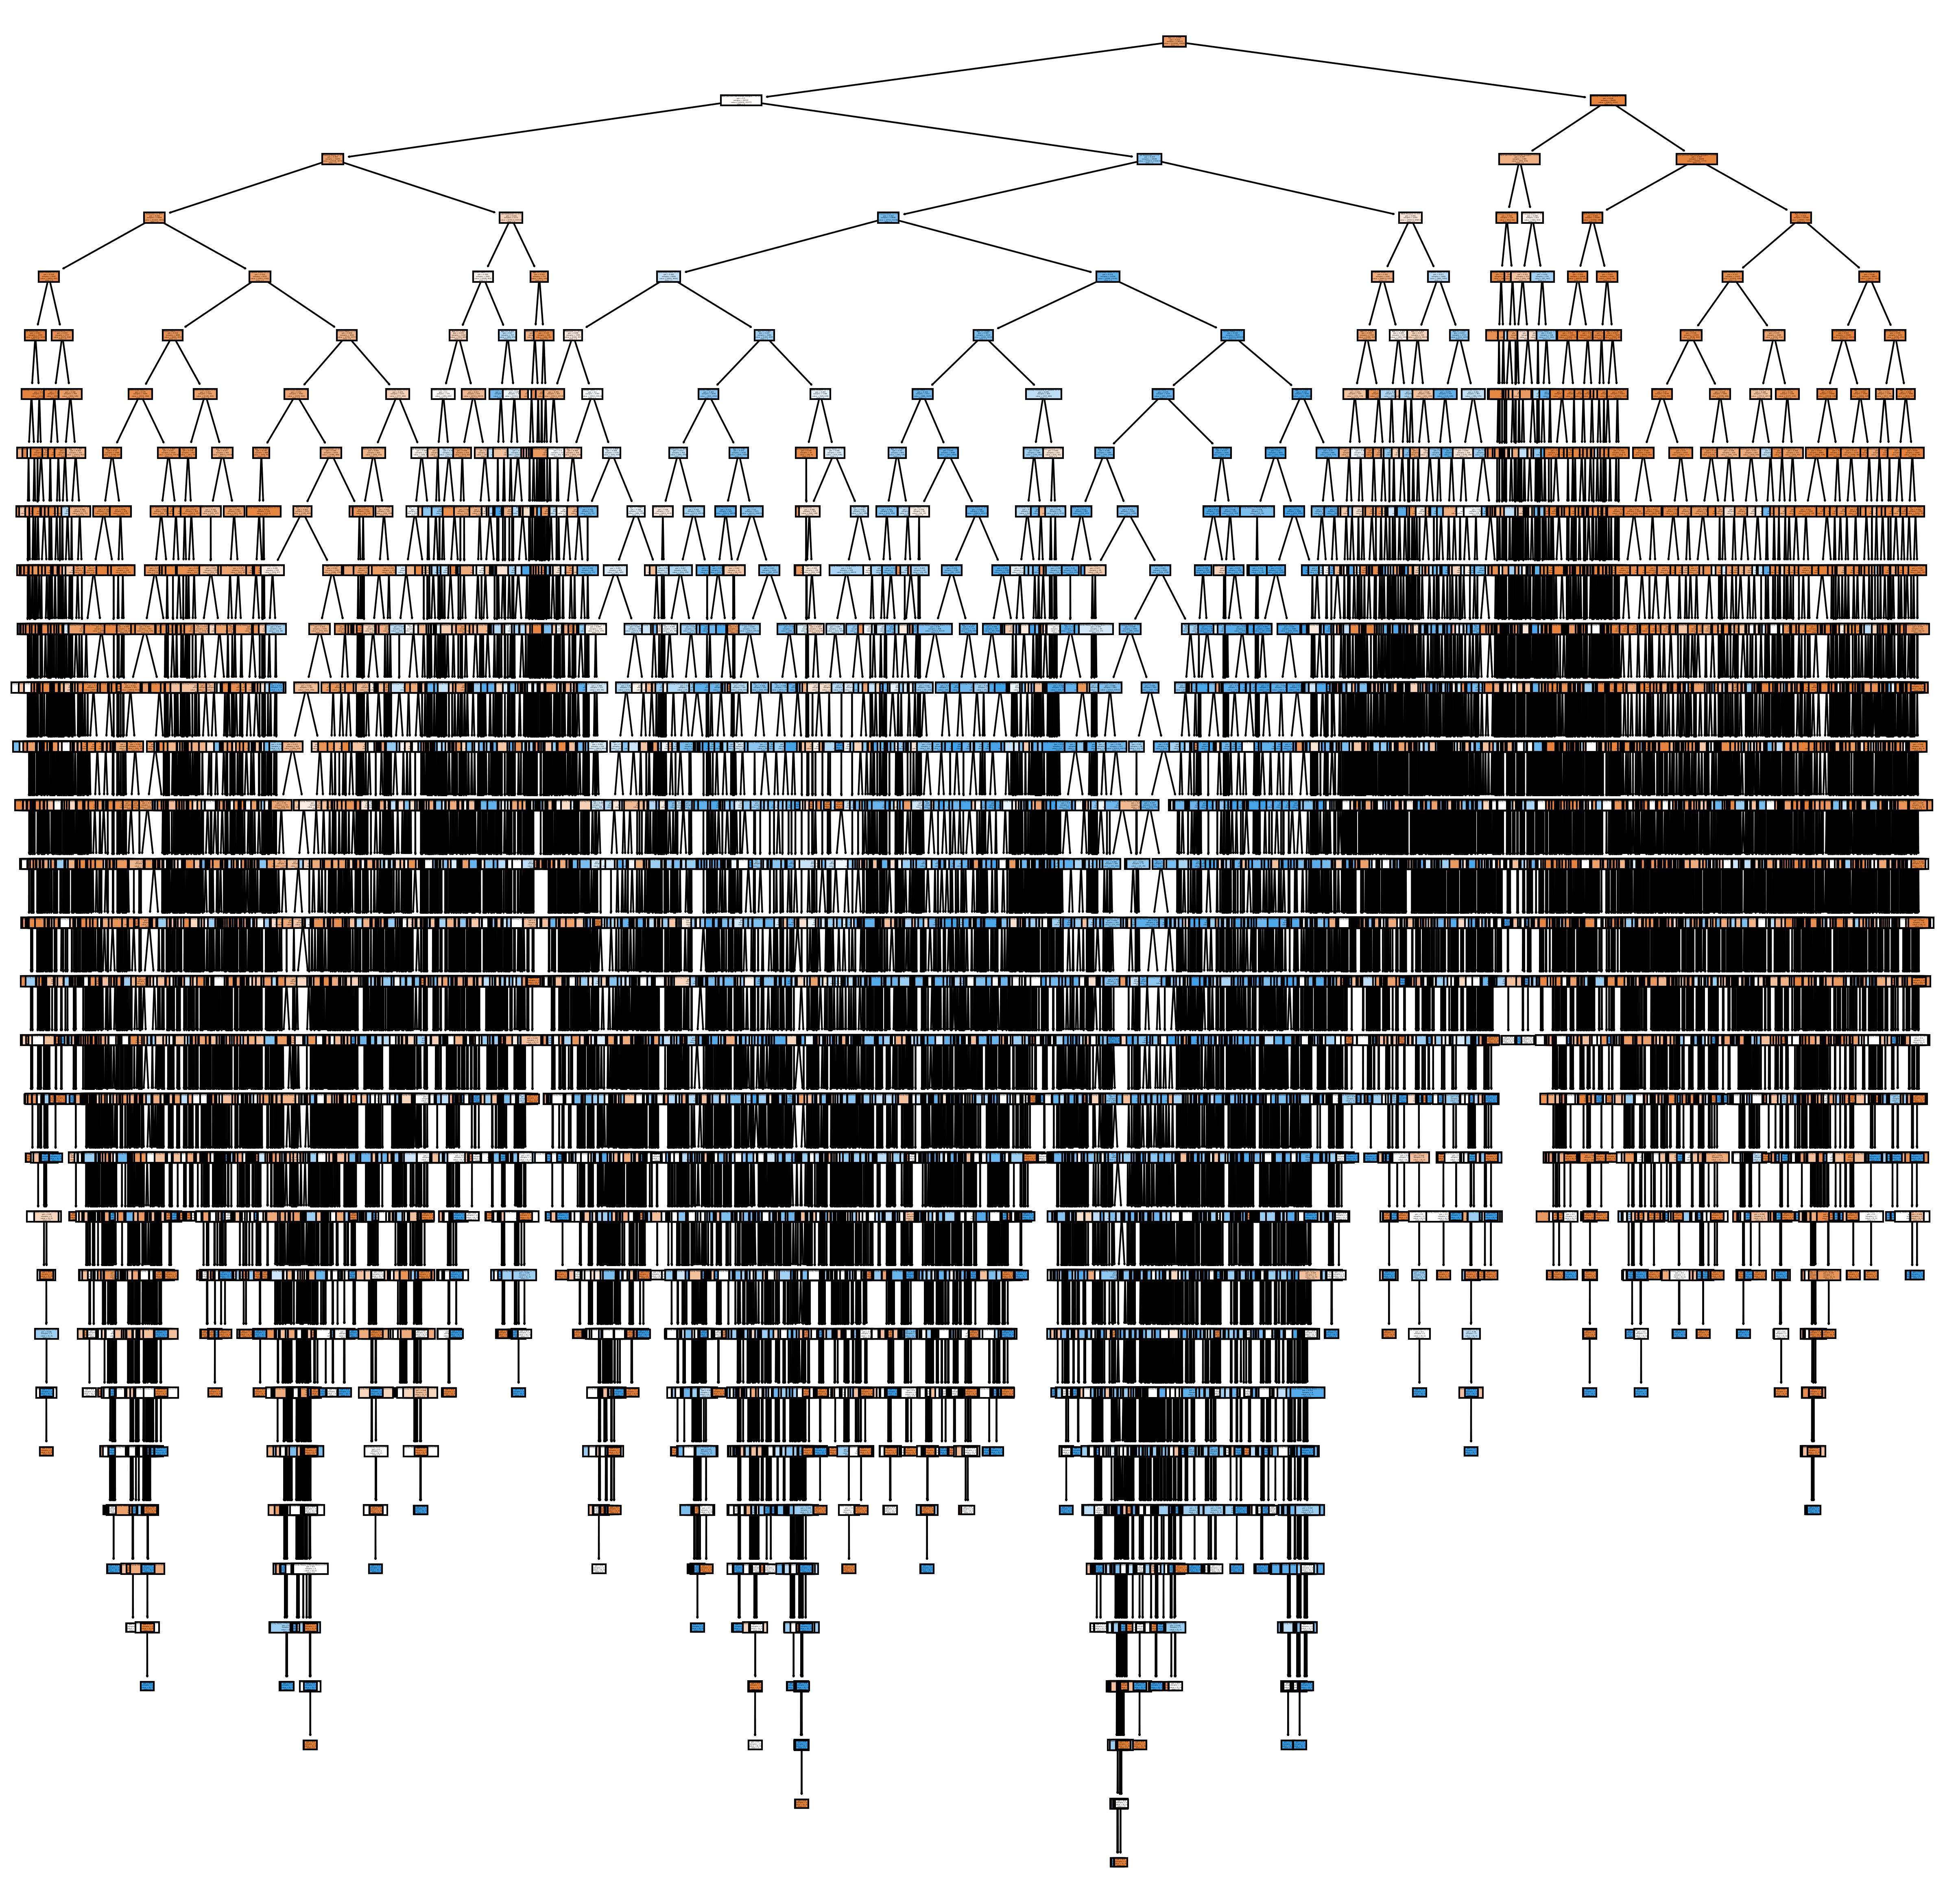

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
          feature_names=X.columns.tolist(),
          class_names=['0','1'])
plt.show()

In [100]:
# Hyper parameter tuning
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,20))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X,y)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=15, random_state=True)

In [102]:
# Important features
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_dt = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

['Gender',
 'Age',
 'Working Professional or Student',
 'Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness']

In [104]:
# Selecting train & Test data
X_dt = X[important_features_dt]

# Modeling
dt = dt_grid.best_estimator_
dt.fit(X_dt,y)

# Evaluation
ypred = dt.predict(X_dt)

print('Train Accuracy:',accuracy_score(y,ypred))
print('CV Score:',cross_val_score(dt,X_dt,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.9551015084988914
CV Score: 0.9292092335782289


**5. Random Forest Classifier**

In [107]:
# Hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,11))}

rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X,y)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=9, random_state=True)

In [109]:
# Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_rf = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_rf

['Gender',
 'Age',
 'Working Professional or Student',
 'Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness']

In [111]:
# Selecting train & Test data
X_rf = X[important_features_rf]

# Modeling
rf = rf_grid.best_estimator_
rf.fit(X_rf,y)

# Evaluation
ypred = rf.predict(X_rf)

print('Train Accuracy:',accuracy_score(y,ypred))
print('CV Score:',cross_val_score(rf,X_rf,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.9925357562057123
CV Score: 0.9433639090553406


**6. AdaBoost Classifier**

In [212]:
# Hyper parameter tuning
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,11))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X,y)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=10, random_state=True)

**Observations:**
- Since the no of records increase after over sampling, in adaboost number of estimators is increased. beacuse in each estimator decision tree stump (max depth = 1). It require more estimators to classify correctly.

In [215]:
# Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_ab = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Age',
 'Working Professional or Student',
 'Work Pressure',
 'Job Satisfaction',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress']

In [217]:
# Selecting train & Test data
X_ab = X[important_features_ab]

# Modeling
ab = ab_grid.best_estimator_
ab.fit(X_ab,y)

# Evaluation
ypred = ab.predict(X_ab)

print('Train Accuracy:',accuracy_score(y,ypred))
print('CV Score:',cross_val_score(ab,X_ab,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.9203537304619412
CV Score: 0.9208375291021991


**7. Gradient Boost Classifier**

In [106]:
# Hyper parameter tuning
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,10)),
             'learning_rate':[0.1,0.01]
             }
from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X,y)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=9, random_state=True)

In [108]:
# Important features
feats_ab = pd.DataFrame(data=gb.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_gb = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_gb

['Age',
 'Working Professional or Student',
 'Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Have you ever had suicidal thoughts ?',
 'Financial Stress']

In [110]:
# Selecting train & Test data
X_gb = X[important_features_gb]

# Modeling
gb = gb_grid.best_estimator_
gb.fit(X_gb,y)

# Evaluation
ypred = gb.predict(X_gb)

from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y,ypred))
from sklearn.model_selection import cross_val_score
print('CV Score:',cross_val_score(gb,X_gb,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.9018799801717952
CV Score: 0.9017319667618328


**8. XGBoost Classifier**

In [16]:
# Hyper parameter tuning
from xgboost import XGBClassifier
estimator = XGBClassifier()

param_grid = {'n_estimators':[200,220,250],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]
             }
from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(X,y)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.15, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_xgb = feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['Gender',
 'Age',
 'Working Professional or Student',
 'Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness']

In [22]:
# Selecting train & Test data
X_xgb = X[important_features_xgb]

# Modeling
xgb = xgb_grid.best_estimator_
xgb.fit(X_xgb,y)

# Evaluation
ypred = xgb.predict(X_xgb)

print('Train Accuracy:',accuracy_score(y,ypred))
print('CV Score:',cross_val_score(xgb,X_xgb,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.932858169195422
CV Score: 0.9315849068840969


In [52]:
import pickle
pickle.dump(xgb,open('mental_health_xgb6.pkl','wb'))